In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import simpson
import scipy.integrate as si
import pickle
import seaborn as sns
import scipy.optimize as so
import sympy as sp

In [ ]:
# Set up mass-concentration relationship
mc_data = np.loadtxt(r"..\Data\mass-concentration relationship.txt", dtype='float', comments='#', delimiter=',')
concentration_mass_interpolator = interp1d(10**(mc_data[:,0]), mc_data[:,1])
# To use the above interpolator, pass as argument the mass of minihalo. The interpolator will output 'concentration X (1 + infall_redshift)'

# Set up collpase fraction and derivative of colapse functions relationship with respect ot redhsift
with open(r'..\Data\collapse_fraction_interpolation_wrong_Mmin.pickle', 'rb') as f: #Mmin=1e-2 
    get_collapse_fraction_1eMinus2 = pickle.load(f)

with open(r'..\Data\collapse_fraction_interpolation.pickle', 'rb') as f: 
    get_collapse_fraction_1e2 = pickle.load(f) #is using S2023 Mmin=1e2

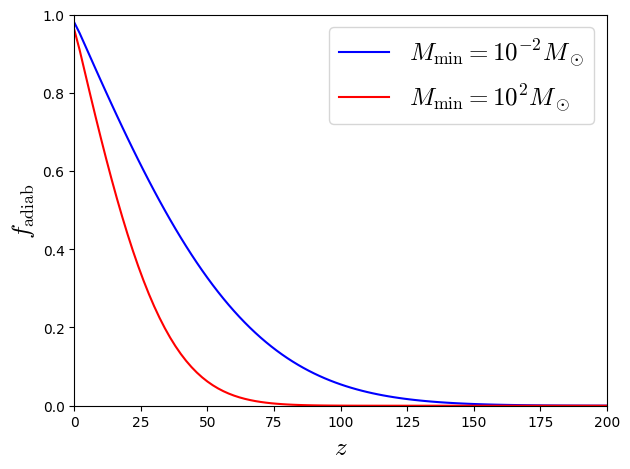

In [3]:
zs = np.linspace(0, 200, 101) # redshift values

plt.rcParams["mathtext.fontset"] = "cm"
plt.plot(zs, get_collapse_fraction_1eMinus2(zs), color="blue", label=r"$M_{\rm min} = 10^{-2}M_\odot$")
plt.plot(zs, get_collapse_fraction_1e2(zs), color="red", label=r"$M_{\rm min} = 10^2 M_\odot$")
plt.xlabel(r"$z$", fontsize=18)
plt.ylabel(r"$f_{\rm adiab}$", fontsize=18)
plt.xlim(0, 200)
plt.ylim(0, 1)
plt.legend(fontsize=18)
plt.tight_layout()
# plt.savefig("collapse_fractions.pdf")
plt.show()